
# Visualisierung der Daten

**Praktische Untersuchungen zur Beschreibung und Visualisierung der Arbeitsdaten**

### Import von Bibliotheken und anderen Erweiterungen

In [38]:
from sqlalchemy import create_engine
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Definitionen zur Darstellung der Visualisierungen

In [39]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [40]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [41]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [42]:
query = """SELECT * FROM moodle_data"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Auswahl der Arbeitsdaten

In [43]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

&nbsp;
**Begrenzung der Selektion auf Einzelbenutzer**

In [44]:
# Gegenstand der Untersuchungen sind nur Datensätze mit einer userid größer als 0. Damit werden jene Benutzer bei der Analyse nicht beachtet, die einer
# Beobachtung ihres Verhaltens nicht zugestimmt haben (userid = –2) oder die im Bachelor-Studiengang Medieninformatik Online studierten (userid = –3).
moodle_data = moodle_data[moodle_data.userid > 0]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,-2,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233121,2020-10-12 07:19:09,,0
2,0,0,3,0,loggedin,\core\event\user_loggedin,user,3463,2020-10-12 07:22:31,,0
3,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233436,2020-10-12 07:48:03,,0
4,0,0,4,0,loggedin,\core\event\user_loggedin,user,6881,2020-10-12 07:55:19,,0
...,...,...,...,...,...,...,...,...,...,...,...
969025,0,0,26,26,viewed,\core\event\dashboard_viewed,,0,2021-06-03 10:00:41,,0
969026,1750,0,26,0,viewed,\core\event\course_viewed,,0,2021-06-03 10:00:45,,0
969027,1750,0,26,0,viewed,\mod_forum\event\course_module_viewed,forum,7082,2021-06-03 10:00:47,,0
969028,1750,0,26,0,viewed,\mod_forum\event\discussion_viewed,forum_discussions,334595,2021-06-03 10:00:49,,0


### Menge der Log-Einträge pro Benutzer

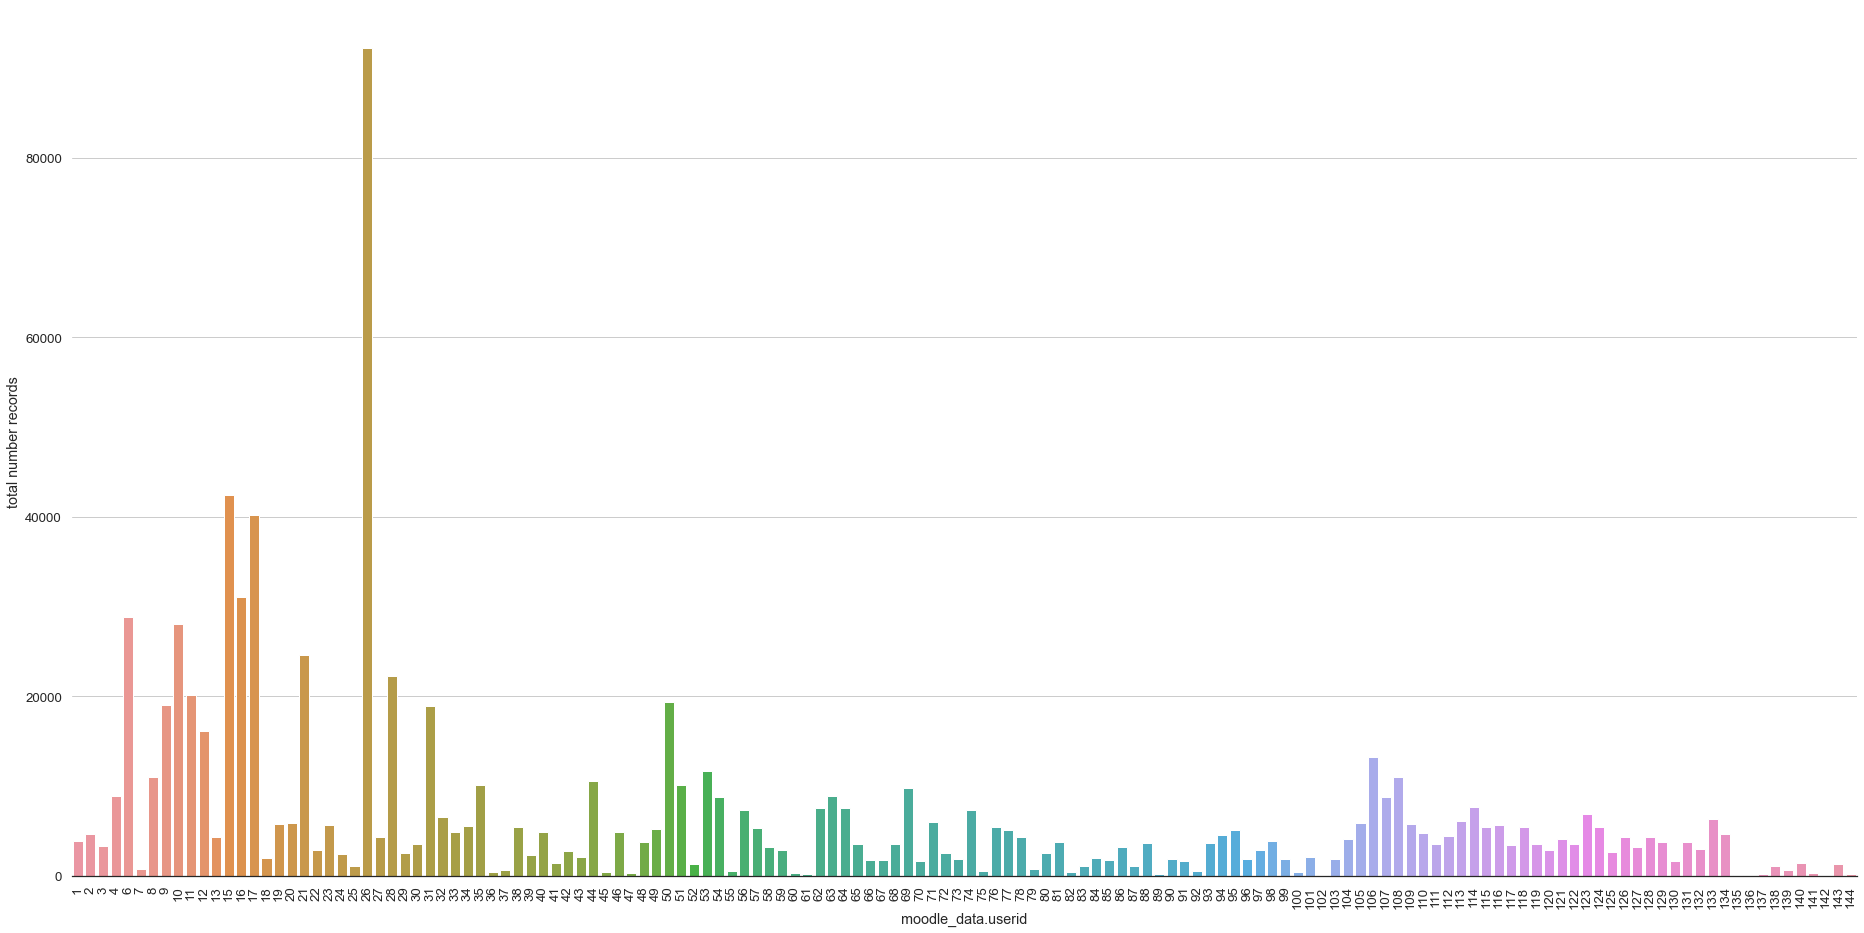

In [45]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 16)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Benutzer
chart = sns.countplot(x=moodle_data.userid)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.userid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/Menge_der_Log-Eintraege_pro_Benutzer.pdf', format='pdf')
plt.show()

### Menge der Benutzer pro Studiengang

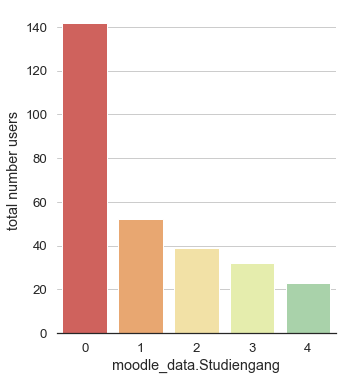

In [46]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(5, 6)) # Größe der Visualisierung (in inch)

# Ermittlung der Menge der Benutzer pro Studiengang
result = moodle_data.userid.groupby(moodle_data.Studiengang).nunique()
# Visualisierung der Menge der Benutzer pro Studiengang
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.Studiengang')
chart.set_ylabel('total number users')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/Menge_der_Benutzer_pro_Studiengang.pdf', format='pdf')
plt.show()

### Menge der Kurse pro Benutzer

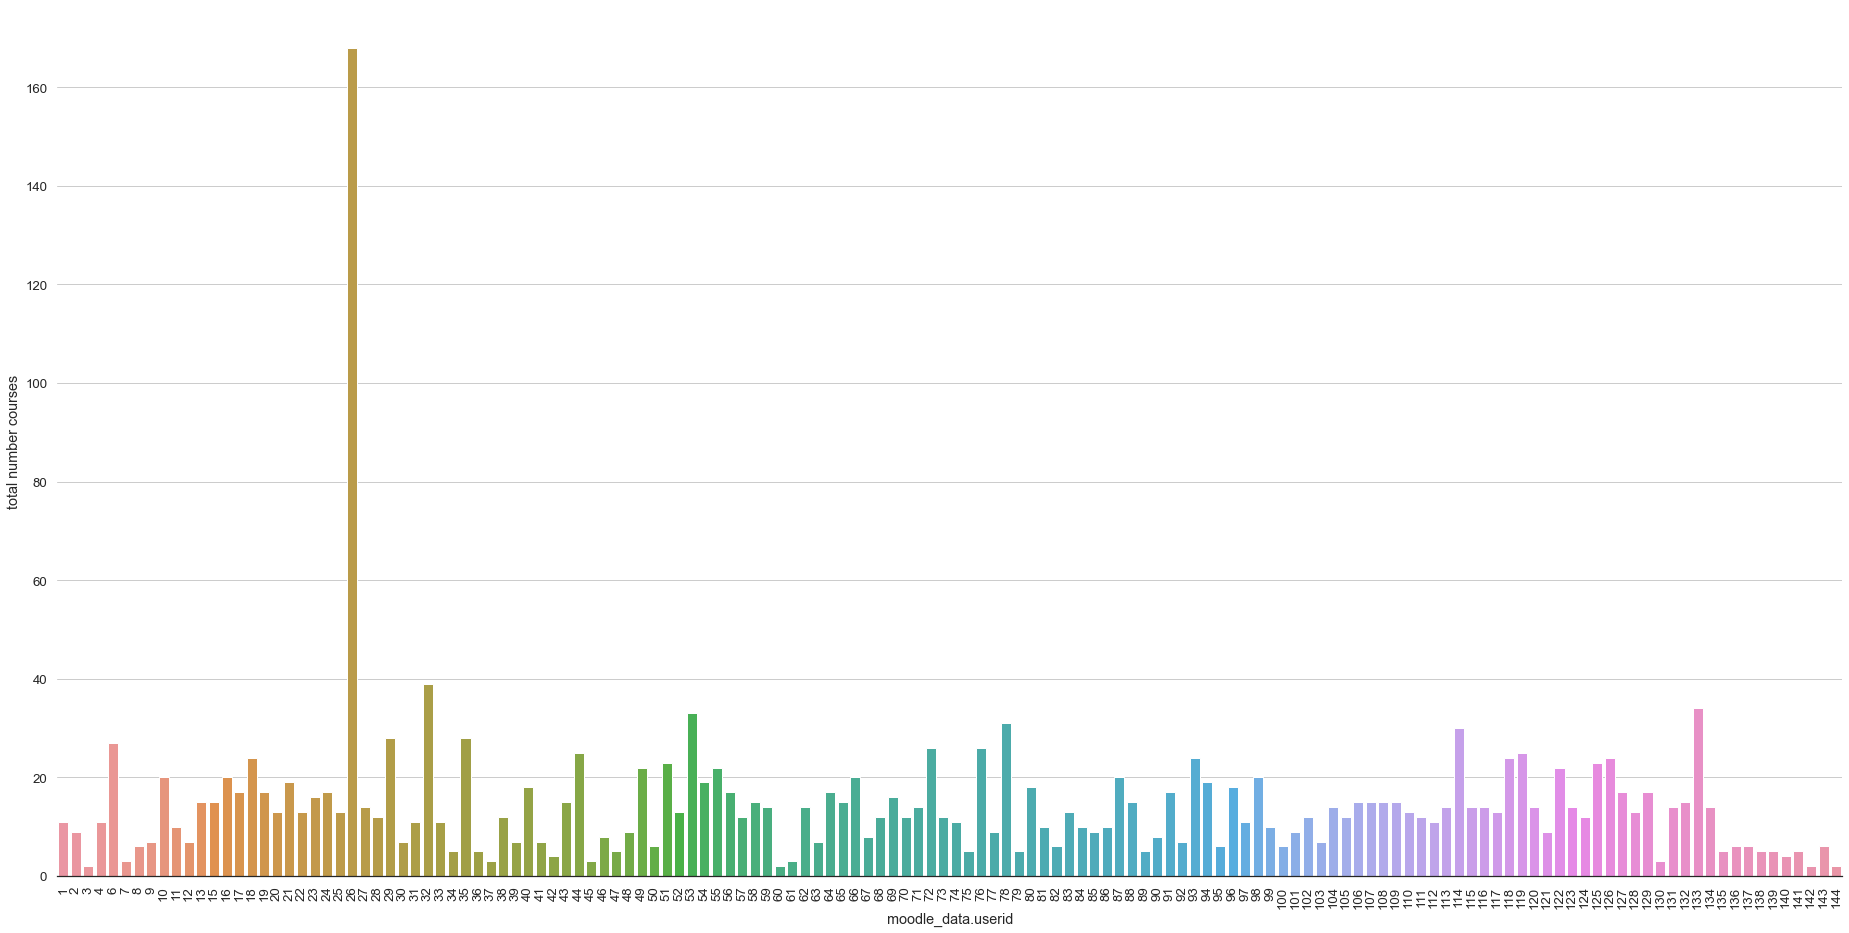

In [47]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 16)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Kurse pro Benutzer
result = moodle_data.courseid.groupby(moodle_data.userid).nunique()
# Visualisierung der Menge der Kurse pro Benutzer
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.userid')
chart.set_ylabel('total number courses')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/Menge_der_Kurse_pro_Benutzer.pdf', format='pdf')
plt.show()

### Häufigkeiten von Kursmengen

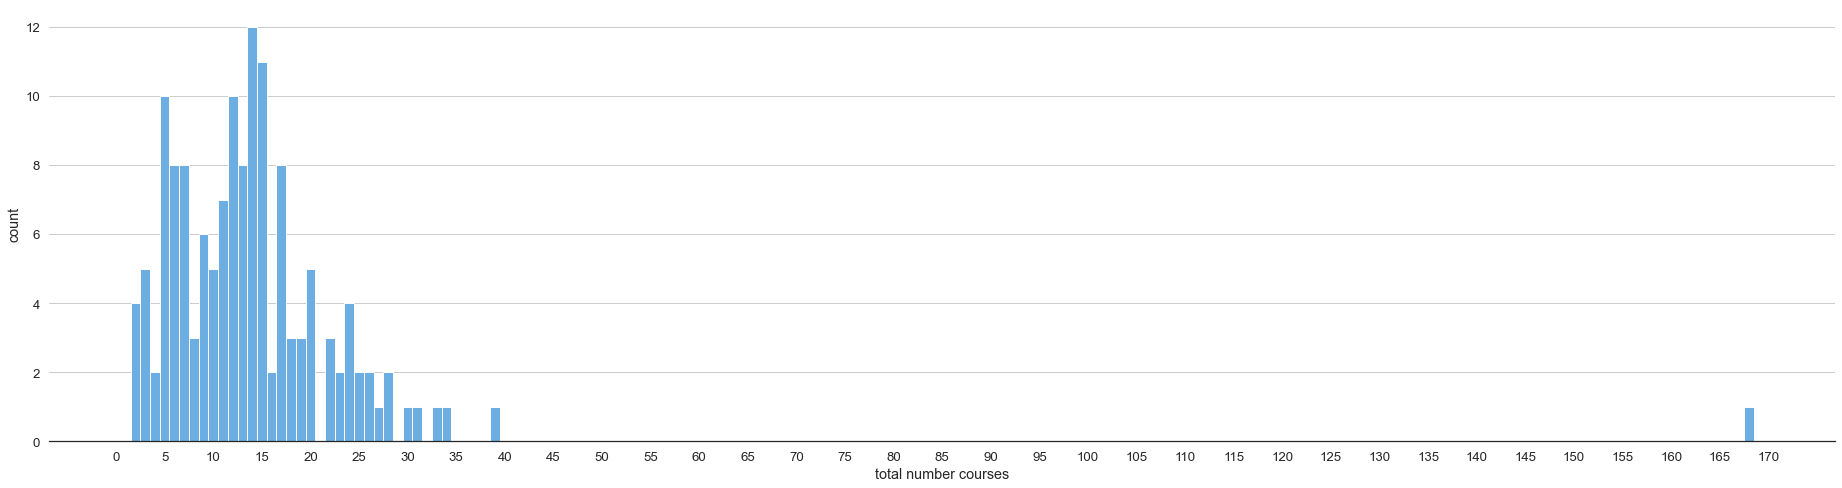

In [48]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 8)) # Größe der Visualisierung (in inch)

# Ermittlung der Häufigkeiten von Kursmengen
result = moodle_data.courseid.groupby(moodle_data.userid).nunique()
# Visualisierung der Häufigkeiten von Kursmengen
chart = sns.histplot(data=result, bins=171, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 171, 5))
chart.tick_params(left=False, bottom=False)
chart.set_xlabel('total number courses')
chart.set_ylabel('count')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()